# Stackoverflow 2022 Annual Developer Survey - EDA

![](https://thealgoristsblob.blob.core.windows.net/thealgoristsimages/stackoverflow.png)

## There is a huge population out there who use stackoverflow for various proessional reasons and this dataset is a collection of the stackoverflow developer community!

The outcome of this data analysis and visualization project is to provide insights to understand the stackoverflow developer community for the year 2022.This resource is vital for new and experienced developers to understand the industry's environment abd landscape. In this survey, we can filter response data by country, age,employment,tools used etc and also make interactive visualizations to understand the same. It’s also great for keeping up to date with ever-changing tech trends!.
Various python Libraries such as Numpy, Pandas, Matplotlib and seaborn are used in this project. The dataset used for this project can obtained from Stackoverflow Insights page - https://insights.stackoverflow.com/survey .

## 5 characteristics of quality data
- Validity: The degree to which your data conforms to defined business rules or constraints.
- Accuracy: Ensure your data is close to the true values.
- Completeness: The degree to which all required data is known.
- Consistency: Ensure your data is consistent within the same dataset and/or across multiple data sets.
- Uniformity: The degree to which the data is specified using the same unit of measure.

# Data Preparation and Cleaning
Data preparation
Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data, and combining datasets to enrich data.
Data preparation is often a lengthy undertaking for data engineers or business users, but it is essential as a prerequisite to put data in context in order to turn it into insights and eliminate bias resulting from poor data quality.

Data preparation helps:
- Fix errors quickly — Data preparation helps catch errors before processing. After data has been removed from its original source, these errors become more difficult to understand and correct.
- Produce top-quality data — Cleaning and reformatting datasets ensures that all data used in analysis will be of high quality.
- Make better business decisions — Higher-quality data that can be processed and analyzed more quickly and efficiently leads to more timely, efficient, better-quality business decisions.

Data cleaning:
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct.

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

In [208]:
#use pandas to import data
import pandas as pd

In [209]:
data_df=pd.read_csv('survey_results_public.csv')

In [210]:
data_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [211]:
# read from the schema file
schema_df=pd.read_csv('survey_results_schema.csv',index_col="qname").question
schema_df

qname
SOVisitFreq    How frequently would you say you visit Stack O...
SOAccount                  Do you have a Stack Overflow account?
SOPartFreq     How frequently would you say you participate i...
SOComm         Do you consider yourself a member of the Stack...
Gender         Which of the following describe you, if any? P...
                                     ...                        
Currency       Which currency do you use day-to-day? If your ...
CompTotal      What is your current total compensation (salar...
CompFreq        Is that compensation weekly, monthly, or yearly?
Country                                     Where do you live? *
OpSys          What is the primary operating system in which ...
Name: question, Length: 70, dtype: object

In [212]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'WorkExp',
    # Programming experience
    'CodingActivities',
    'LearnCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith',
    'NEWCollabToolsWantToWorkWith',
    # Employment
    'Employment',
    'DevType',
    'RemoteWork',
    'MainBranch'
]

In [213]:
schema_df['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [214]:
# shallow copy a set of data
data_copy=data_df[selected_columns].copy()

In [215]:
data_copy

,Country,Age,Gender,EdLevel,WorkExp,CodingActivities,LearnCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,Employment,DevType,RemoteWork,MainBranch
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of these
1,Canada,NaN,NaN,NaN,NaN,Hobby;Contribute to open-source projects,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,"Employed, full-time",NaN,Fully remote,I am a developer by profession
2,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Hobby,Books / Physical media;Friend or family member...,14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Notepad++;Visual Studio,Notepad++;Visual Studio,"Employed, full-time",Data scientist or machine learning specialist;...,"Hybrid (some remote, some in-person)","I am not primarily a developer, but I write co..."
3,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,I don’t code outside of work,"Books / Physical media;School (i.e., Universit...",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,"Employed, full-time","Developer, full-stack",Fully remote,I am a developer by profession
4,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Hobby,"Other online resources (e.g., videos, blogs, f...",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Notepad++;Visual Studio;Visual Studio Code;Xcode,Rider;Visual Studio;Visual Studio Code,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...","Hybrid (some remote, some in-person)",I am a developer by profession
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,Freelance/contract work,Books / Physical media;Other online resources ...,8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,IPython/Jupyter;Sublime Text;Vim;Visual Studio...,Sublime Text;Vim;Visual Studio Code,"Employed, full-time","Developer, back-end",Fully remote,I am a developer by profession
73264,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,Hobby,"Other online resources (e.g., videos, blogs, f...",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,IPython/Jupyter;Notepad++;Spyder;Vim;Visual St...,Notepad++;Spyder;Vim;Visual Studio Code,"Employed, full-time",Data scientist or machine learning specialist,Full in-person,I am a developer by profession
73265,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42.0,Hobby;School or academic work,Books / Physical media;Other online resources ...,42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Spyder;Visual Studio;Visual Studio Code,Spyder;Visual Studio;Visual Studio Code,"Employed, full-time","Developer, full-stack;Developer, desktop or en...","Hybrid (some remote, some in-person)","I am not primarily a developer, but I write co..."
73266,United Kingdom of Great Britain and Northern I...,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Hobby,Books / Physical media;On the job training,50,31,C#;Delphi;VBA,Delphi,"RAD Studio (Delphi, C++ Builder);Visual Studio","RAD Studio (Delphi, C++ Builder);Visual Studio","Employed, full-time","Developer, front-end;Developer, desktop or ent...","Hybrid (some remote, some in-person)",I am a developer by profession


In [216]:
len(selected_columns)

17

In [217]:
data_df.shape

(73268, 79)

In [218]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

## Next we create a survey_df dataframe to maintain a frame of selected column attributes

In [219]:
survey_df=data_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,WorkExp,CodingActivities,LearnCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,Employment,DevType,RemoteWork,MainBranch
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of these
1,Canada,NaN,NaN,NaN,NaN,Hobby;Contribute to open-source projects,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,"Employed, full-time",NaN,Fully remote,I am a developer by profession
2,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Hobby,Books / Physical media;Friend or family member...,14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Notepad++;Visual Studio,Notepad++;Visual Studio,"Employed, full-time",Data scientist or machine learning specialist;...,"Hybrid (some remote, some in-person)","I am not primarily a developer, but I write co..."
3,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,I don’t code outside of work,"Books / Physical media;School (i.e., Universit...",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,"Employed, full-time","Developer, full-stack",Fully remote,I am a developer by profession
4,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Hobby,"Other online resources (e.g., videos, blogs, f...",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Notepad++;Visual Studio;Visual Studio Code;Xcode,Rider;Visual Studio;Visual Studio Code,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...","Hybrid (some remote, some in-person)",I am a developer by profession
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,Freelance/contract work,Books / Physical media;Other online resources ...,8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,IPython/Jupyter;Sublime Text;Vim;Visual Studio...,Sublime Text;Vim;Visual Studio Code,"Employed, full-time","Developer, back-end",Fully remote,I am a developer by profession
73264,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,Hobby,"Other online resources (e.g., videos, blogs, f...",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,IPython/Jupyter;Notepad++;Spyder;Vim;Visual St...,Notepad++;Spyder;Vim;Visual Studio Code,"Employed, full-time",Data scientist or machine learning specialist,Full in-person,I am a developer by profession
73265,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42.0,Hobby;School or academic work,Books / Physical media;Other online resources ...,42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Spyder;Visual Studio;Visual Studio Code,Spyder;Visual Studio;Visual Studio Code,"Employed, full-time","Developer, full-stack;Developer, desktop or en...","Hybrid (some remote, some in-person)","I am not primarily a developer, but I write co..."
73266,United Kingdom of Great Britain and Northern I...,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Hobby,Books / Physical media;On the job training,50,31,C#;Delphi;VBA,Delphi,"RAD Studio (Delphi, C++ Builder);Visual Studio","RAD Studio (Delphi, C++ Builder);Visual Studio","Employed, full-time","Developer, front-end;Developer, desktop or ent...","Hybrid (some remote, some in-person)",I am a developer by profession


In [220]:
survey_df.shape

(73268, 17)

In [221]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       71771 non-null  object 
 1   Age                           70946 non-null  object 
 2   Gender                        70853 non-null  object 
 3   EdLevel                       71571 non-null  object 
 4   WorkExp                       36769 non-null  float64
 5   CodingActivities              58899 non-null  object 
 6   LearnCode                     71580 non-null  object 
 7   YearsCode                     71331 non-null  object 
 8   YearsCodePro                  51833 non-null  object 
 9   LanguageHaveWorkedWith        70975 non-null  object 
 10  LanguageWantToWorkWith        67027 non-null  object 
 11  NEWCollabToolsHaveWorkedWith  70347 non-null  object 
 12  NEWCollabToolsWantToWorkWith  64108 non-null  object 
 13  E

In [222]:
survey_df.YearsCode.unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [223]:
df=survey_df.dropna().reset_index(drop=True)
df

,Country,Age,Gender,EdLevel,WorkExp,CodingActivities,LearnCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,Employment,DevType,RemoteWork,MainBranch
0,United States of America,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",14.0,Hobby;Contribute to open-source projects;Freel...,"Other online resources (e.g., videos, blogs, f...",12,10,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,C++;Go;HTML/CSS;JavaScript;Lua;Rust;TypeScript,IPython/Jupyter;Neovim;Visual Studio;Visual St...,IPython/Jupyter;Neovim;Visual Studio Code,"Employed, full-time;Independent contractor, fr...",Engineering manager,Fully remote,"I am not primarily a developer, but I write co..."
1,United States of America,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,Hobby,"School (i.e., University, College, etc)",12,5,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Haskell;HTML/CSS;Rust;Swift,Vim;Visual Studio,Vim;Visual Studio,"Employed, full-time","Developer, full-stack","Hybrid (some remote, some in-person)",I am a developer by profession
2,Australia,35-44 years old,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15.0,Hobby,"Books / Physical media;School (i.e., Universit...",22,15,Elixir;Erlang;HTML/CSS;JavaScript;Ruby;SQL;Typ...,Elixir;Erlang;HTML/CSS;JavaScript;Ruby;SQL;Typ...,Visual Studio Code,Visual Studio Code,"Employed, part-time","Developer, front-end;Developer, full-stack;Dev...",Fully remote,I am a developer by profession
3,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5.0,Hobby;Freelance/contract work,"Other online resources (e.g., videos, blogs, f...",11,5,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,HTML/CSS;JavaScript;Python;Scala,IPython/Jupyter;Nano;RStudio;Visual Studio Code,Visual Studio Code,"Employed, full-time;Independent contractor, fr...","Developer, full-stack;Academic researcher;DevO...",Fully remote,I am a developer by profession
4,Italy,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4.0,I don’t code outside of work,Other (please specify):,5,4,Python;SQL;TypeScript,Elixir;Julia;Kotlin;Python;Rust;Scala;SQL;Type...,Neovim;Sublime Text;Visual Studio Code,Neovim;Sublime Text;Visual Studio Code,"Employed, full-time","Developer, full-stack","Hybrid (some remote, some in-person)",I am a developer by profession
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30735,Poland,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2.0,Other (please specify):,Books / Physical media;Other online resources ...,6,2,Elixir,Elixir,Visual Studio Code,Visual Studio Code,"Employed, full-time","Developer, back-end","Hybrid (some remote, some in-person)",I am a developer by profession
30736,France,18-24 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2.0,Hobby,Books / Physical media;Other online resources ...,9,2,Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL...,Bash/Shell;HTML/CSS;Java;JavaScript;Kotlin;Pyt...,Eclipse;Notepad++;Visual Studio Code,IntelliJ;Visual Studio Code,"Employed, full-time","Developer, full-stack","Hybrid (some remote, some in-person)",I am a developer by profession
30737,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,Freelance/contract work,Books / Physical media;Other online resources ...,8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,IPython/Jupyter;Sublime Text;Vim;Visual Studio...,Sublime Text;Vim;Visual Studio Code,"Employed, full-time","Developer, back-end",Fully remote,I am a developer by profession
30738,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,Hobby,"Other online resources (e.g., videos, blogs, f...",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,IPython/Jupyter;Notepad++;Spyder;Vim;Visual St...,Notepad++;Spyder;Vim;Visua

from the survey_df.info() we notice that the columns like yearscode and yearcodepro are of type object. Therefore it needs to be converted to numeric values

In [224]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [225]:
survey_df.YearsCode.unique()

array([nan, 14., 20.,  8., 15.,  3.,  1.,  6., 37.,  5., 12., 22., 11.,
        4.,  7., 13., 36.,  2., 25., 10., 40., 16., 27., 24., 19.,  9.,
       17., 18., 26., 29., 30., 32., 48., 45., 38., 39., 28., 23., 43.,
       21., 41., 35., 50., 33., 31., 34., 46., 44., 42., 47., 49.])

the value_counts() function returns a series containing counts of unique values

In [226]:
survey_df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [227]:
import numpy as np

The gender column also allows for picking multiple options. I've removde values containing more than one option to simplify our analysis.

In [228]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [229]:
survey_df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [230]:
survey_df.describe()

,WorkExp,YearsCode,YearsCodePro
count,36478.000000,69081.000000,49433.000000
mean,10.239816,12.414557,10.278599
std,8.697633,9.731131,8.581482
min,0.000000,1.000000,1.000000
25%,4.000000,5.000000,4.000000
50%,8.000000,10.000000,8.000000
75%,15.000000,17.000000,15.000000
max,50.000000,50.000000,50.000000


In [231]:
survey_df.shape

(73268, 17)

In [232]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,WorkExp,CodingActivities,LearnCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,Employment,DevType,RemoteWork,MainBranch
14563,Netherlands,Under 18 years old,Man,"Secondary school (e.g. American high school, G...",NaN,NaN,"Other online resources (e.g., videos, blogs, f...",3.0,NaN,C#;Groovy;HTML/CSS;Java;JavaScript;Kotlin;Powe...,Java;Kotlin;Rust;SQL,GoLand;IntelliJ;Notepad++;PhpStorm;Rider;Visua...,IntelliJ;Notepad++;Rider,"Student, full-time",NaN,NaN,I am learning to code
31634,New Zealand,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15.0,Hobby,Books / Physical media;Friend or family member...,28.0,15.0,Bash/Shell;C#;Go;Python;SQL,Bash/Shell;C#;Python;Rust;SQL,Notepad++;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,"Employed, full-time","Engineer, data;Developer, back-end;DevOps spec...",Fully remote,I am a developer by profession
47833,India,Under 18 years old,Man,"Secondary school (e.g. American high school, G...",NaN,NaN,"Other online resources (e.g., videos, blogs, f...",2.0,NaN,Java;PowerShell;Python,C++;HTML/CSS;JavaScript;Python,Android Studio;IPython/Jupyter;Notepad++;PyCha...,PyCharm,I prefer not to say,NaN,NaN,I code primarily as a hobby
55619,United States of America,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,Hobby,"Books / Physical media;School (i.e., Universit...",13.0,9.0,Groovy;Java;JavaScript;PowerShell;Python,Groovy;PowerShell;Python,IntelliJ;Notepad++;Vim,IntelliJ;Notepad++,"Employed, full-time",DevOps specialist,Fully remote,I am a developer by profession
53591,France,25-34 years old,Man,Some college/university study without earning ...,2.0,Hobby;Contribute to open-source projects;Freel...,Books / Physical media;Other online resources ...,3.0,2.0,JavaScript;TypeScript,Go;Rust;TypeScript,GoLand;Neovim;Visual Studio Code;Webstorm,Neovim;Visual Studio Code;Webstorm,"Employed, full-time","Developer, front-end;Developer, full-stack;Pro...",Fully remote,I am a developer by profession
36617,Brazil,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,Hobby;School or academic work,"Books / Physical media;School (i.e., Universit...",9.0,NaN,C#;Dart;Elixir;HTML/CSS;JavaScript;Python;SQL;...,Elixir;JavaScript;TypeScript,Android Studio;Neovim;Vim;Visual Studio;Visual...,Neovim;Vim;Visual Studio Code,"Employed, full-time;Student, part-time","Developer, front-end;Developer, full-stack",Fully remote,I am a developer by profession
63325,Sweden,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",14.0,Hobby;Bootstrapping a business;Freelance/contr...,"School (i.e., University, College, etc)",16.0,14.0,Java;JavaScript;Ruby;SQL;TypeScript,Java;JavaScript;Python;SQL;Swift;TypeScript,Android Studio;Eclipse;IntelliJ;RubyMine;Subli...,Android Studio;Eclipse;IntelliJ;RubyMine;Subli...,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...","Hybrid (some remote, some in-person)",I am a developer by profession
65136,"Congo, Republic of the...",25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,"Other online resources (e.g., videos, blogs, f...",3.0,NaN,C;HTML/CSS;JavaScript;VBA,Dart;HTML/CSS;JavaScript,Android Studio;Eclipse;Notepad++;Visual Studio...,Visual Studio Code,"Not employed, but looking for work","Developer, full-stack;Developer, mobile",NaN,I am learning to code
30261,Brazil,25-34 years old,Man,Some college/university study without earning ...,9.0,Hobby;Bootstrapping a business,Books / Physical media;Other online resources ...,10.0,NaN,C;Dart;JavaScript;Kotlin;Objective-C;Python;Sw...,C;Dart;Swift;TypeScript,Android Studio;Sublime Text;Visual Studio Code...,Visual Studio Code;Xcode,"Employed, full-time;Student, part-time;Indepen...","Developer, back-end;Developer, mobile;Educator...",Fully remote,I am a developer by profession
19439,Canada,35-44 years old,Man,"Master’s degree (M.A., M.

# Exploratory Data Anlysis and Visualization

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 
The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.
Here using EDA techniques we have analyzed various response data
the packages used are matplotlib and seaborn

In [233]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

## Country based Analysis of Respondants

In [234]:
survey_df["Country"].nunique()

180

In [235]:
survey_df["Country"].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [236]:
top_countries=survey_df["Country"].value_counts().head(10)

In [237]:
top_countries

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Name: Country, dtype: int64

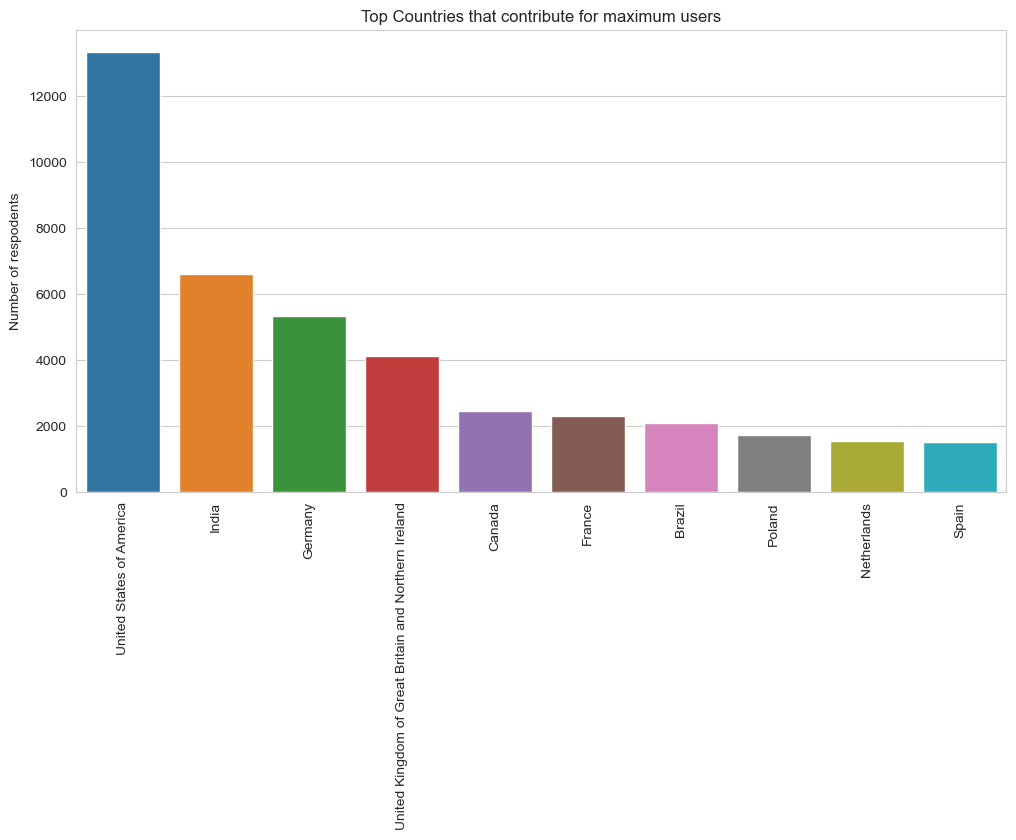

In [238]:
plt.figure(figsize=(12,6))
plt.title("Top Countries that contribute for maximum users")
plt.xticks(rotation=90)
sns.barplot(x=top_countries.index, y=top_countries)
plt.ylabel('Number of respodents');

From the above graph we can conclude that country USA is the maximum contributer from stackoverflow respondants and spain is the least. India is the second highest.A disproportionately high number of respondents are from the US and India.We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

## Gender Proportion of respondants

In [239]:
gender_cnt=survey_df["Gender"].value_counts()
gender_cnt

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

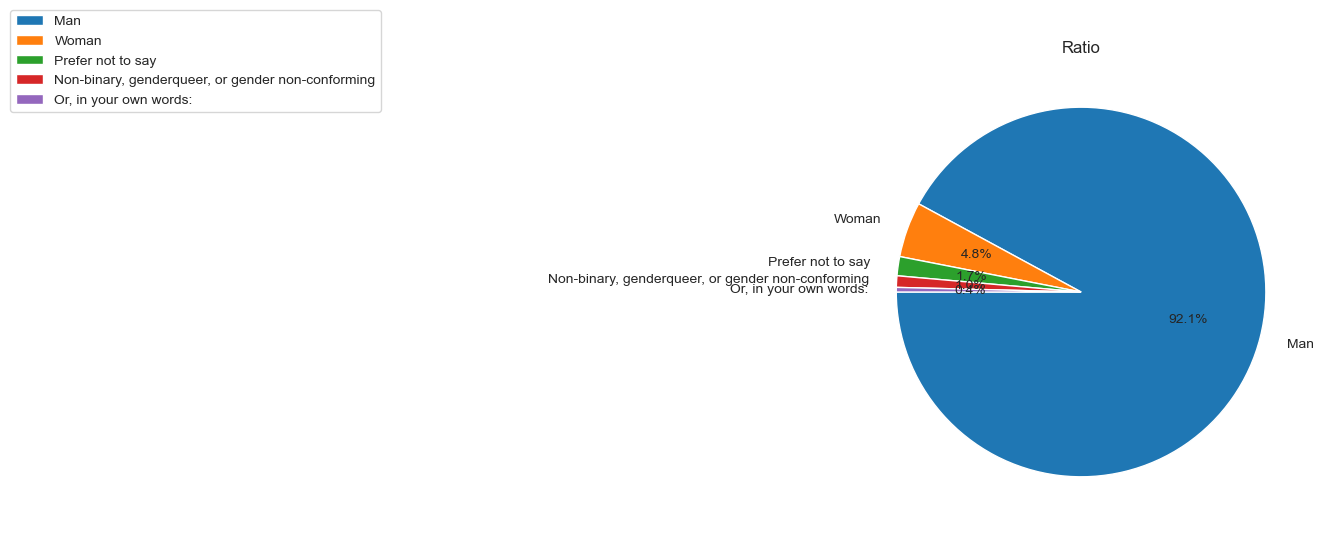

In [240]:
plt.figure(figsize=(12,6))
plt.title("Ratio")
plt.pie(gender_cnt,labels=gender_cnt.index, autopct='%1.1f%%', startangle=180,labeldistance=1.15) 
plt.legend(loc="center right",bbox_to_anchor=(-1,1))
plt.show()

the above pie chart depicts the gender proportion of users who are a part of stackoverflow developer community

## Age of respondants and various analysis based on age

In [241]:
age_count=survey_df["Age"].value_counts()

In [242]:
age_count

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

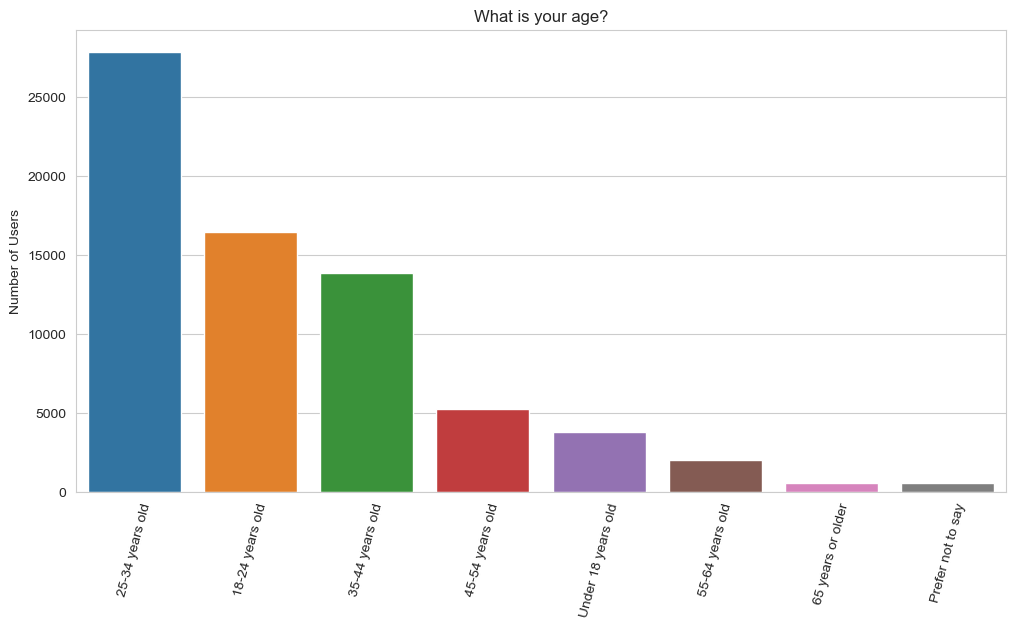

In [243]:
plt.figure(figsize=(12,6))
plt.title(schema_df.Age)
plt.xticks(rotation=75)
sns.barplot(x=age_count.index, y=age_count)
plt.ylabel('Number of Users');

It appears that a large percentage of users are 20-45 years old. It's somewhat represents the programming community in general.
More young respondants are active users

In [244]:
agemean=survey_df.groupby(by="Age").mean()
agemean

,WorkExp,YearsCode,YearsCodePro
Age,,,
18-24 years old,2.641547,5.482011,2.595455
25-34 years old,6.674807,9.807362,6.156403
35-44 years old,14.854388,18.160219,13.301088
45-54 years old,24.859600,28.065691,22.071176
55-64 years old,34.636364,34.786082,30.090187
65 years or older,42.805310,36.603053,36.559459
Prefer not to say,15.977273,11.678879,15.857143
Under 18 years old,5.743590,3.814900,3.119048


In [245]:
work=agemean.value_counts()

In [246]:
work

WorkExp    YearsCode  YearsCodePro
2.641547   5.482011   2.595455        1
5.743590   3.814900   3.119048        1
6.674807   9.807362   6.156403        1
14.854388  18.160219  13.301088       1
15.977273  11.678879  15.857143       1
24.859600  28.065691  22.071176       1
34.636364  34.786082  30.090187       1
42.805310  36.603053  36.559459       1
dtype: int64

<AxesSubplot:title={'center':'Average work experience wrt to age groups'}, xlabel='Age', ylabel='WorkExp'>

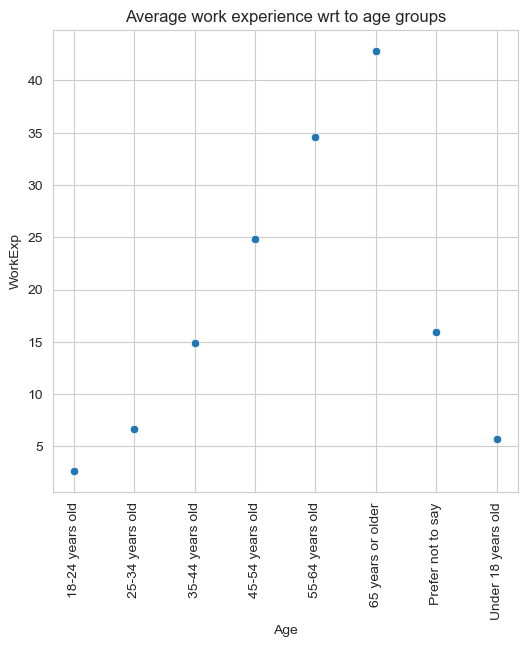

In [247]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
plt.title("Average work experience wrt to age groups")
sns.scatterplot(x='Age',y='WorkExp',data=agemean)

<AxesSubplot:title={'center':'Average Years of Code wrt to age groups'}, xlabel='Age', ylabel='YearsCode'>

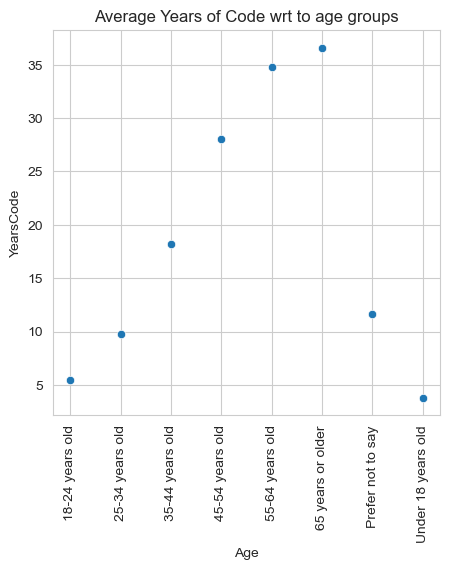

In [248]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
plt.title("Average Years of Code wrt to age groups")
sns.scatterplot(x='Age',y='YearsCode',data=agemean)

It appears that people around the age group of 65 years or older have a greater work experience and Years of code. They may have a retired or may still continue to work or may still code and develop new tech!

[Text(-1.0, 0, 'Under 18 years old'),
 Text(0.0, 0, '18-24 years old'),
 Text(1.0, 0, '25-34 years old'),
 Text(2.0, 0, '35-44 years old'),
 Text(3.0, 0, '45-54 years old'),
 Text(4.0, 0, '55-64 years old'),
 Text(5.0, 0, '65 years or older'),
 Text(6.0, 0, 'Prefer not to say'),
 Text(7.0, 0, 'Under 18 years old'),
 Text(8.0, 0, '')]

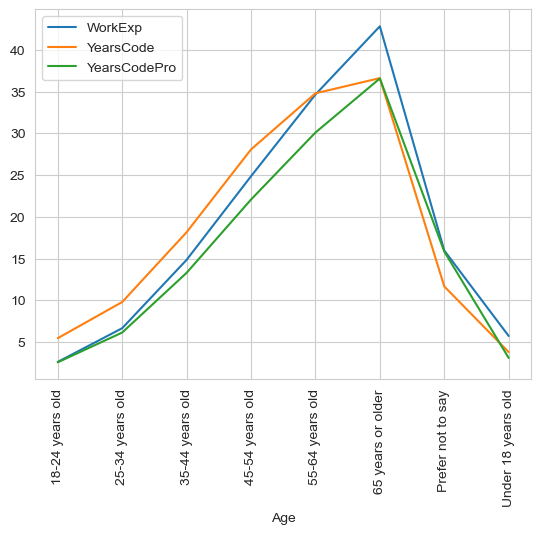

In [249]:
chart=agemean.plot(legend=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

the above plot shows average work experience , years of code and yeras code pro  wrt to differnt age groups,it appears that the age group 65 years and older hold the maximum average for all the three compared to youngsters who also code.

## Education Levels of respondants

Text(0, 0.5, 'Edlevel')

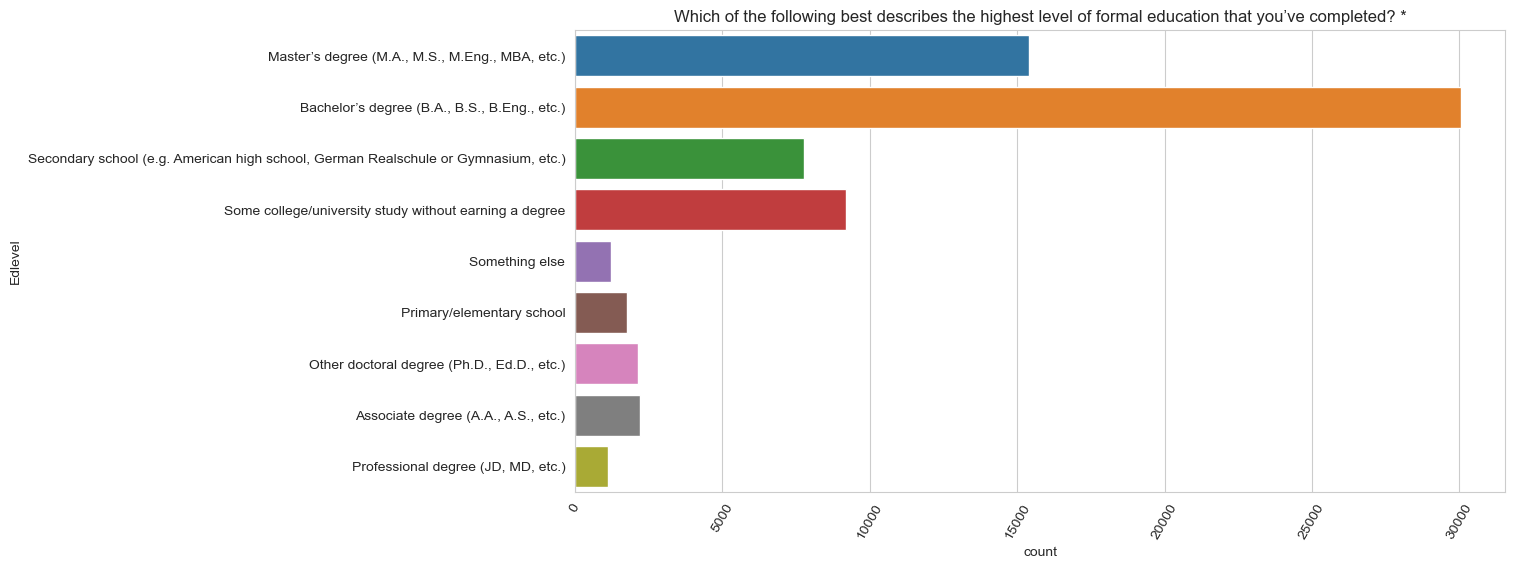

In [250]:
plt.figure(figsize=(12,6))
plt.title(schema_df.EdLevel)
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=60)
plt.ylabel("Edlevel")

In [251]:
edlvl=survey_df["EdLevel"].value_counts()
edlvl

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

In [252]:
survey_df["EdLevel"].count()

70879

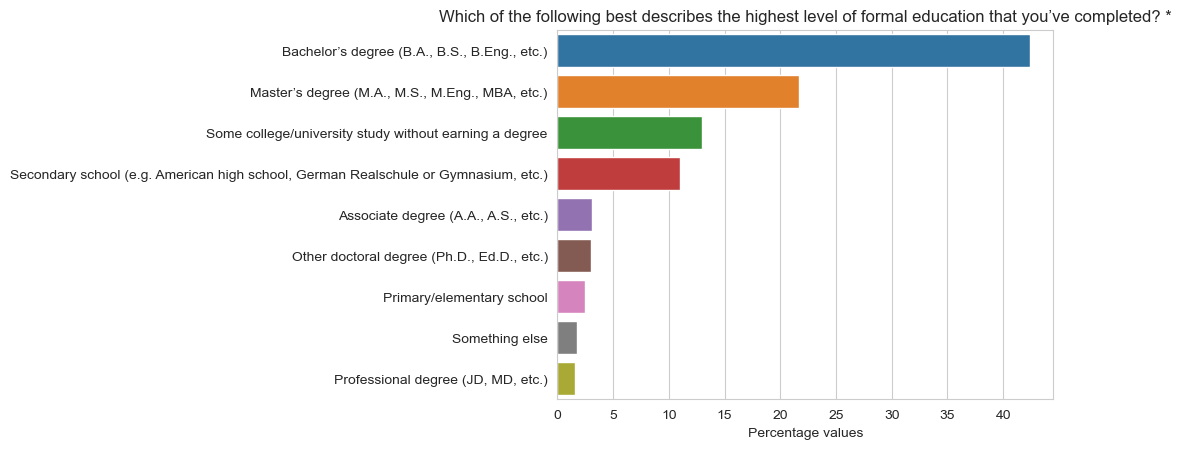

In [253]:
EdLevel_pct = edlvl * 100 / survey_df.EdLevel.count()
sns.barplot(x=EdLevel_pct, y=EdLevel_pct.index)
plt.title(schema_df.EdLevel)
plt.xlabel('Percentage values');

from the given plot most of the programmers have a degree and more than 50% of them possess a bachelors or masters degree compared to others. But the graph does not tell us what the education is 

## Employment Status of Users

In [254]:
survey_df["Employment"].value_counts()

Employed, full-time                                                                                               42644
Student, full-time                                                                                                 6663
Independent contractor, freelancer, or self-employed                                                               4941
Employed, full-time;Independent contractor, freelancer, or self-employed                                           3456
Not employed, but looking for work                                                                                 1810
                                                                                                                  ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                       1
Employed, full-time;Student, full-time;Student, part-time;Independent contractor, freelancer, or self-employed        1
Employed, part-time;Not employed, and no

In [255]:
survey_df.where(~(survey_df["Employment"].str.contains(";",na=False)),np.nan,inplace=True)
survey_df["Employment"].value_counts()

Employed, full-time                                     42644
Student, full-time                                       6663
Independent contractor, freelancer, or self-employed     4941
Not employed, but looking for work                       1810
Employed, part-time                                      1116
Student, part-time                                       1036
Not employed, and not looking for work                    705
I prefer not to say                                       599
Retired                                                   304
Name: Employment, dtype: int64

Text(0.5, 1.0, 'Which of the following best describes your current employment status?')

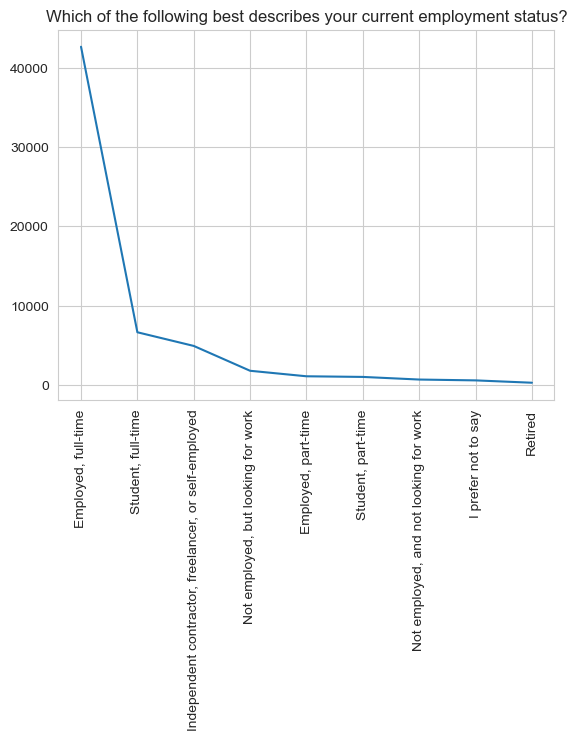

In [256]:
employ=survey_df["Employment"].value_counts()
employ.plot(x=employ.index,y=employ)
plt.xticks(rotation=90)
plt.title(schema_df.Employment)

the above graph describes the employment status od various respondants.Most of the users are either full time employed or student and full time employed.It appears that close to 10% of respondents are employed part time or as freelancers.

## Development Type of most respondants

In [257]:
survey_df["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  6422
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    4879
Developer, front-end                                                                                                                            

a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.

In [258]:
def splitcol(col_series):
    r=col_series.to_frame()
    option=[]
    for idx,value in col_series[col_series.notnull()].iteritems():
        for i in value.split(";"):
            if not i in r.columns:
                option.append(i)
                r[i]=False
            r.at[idx,i]=True
    return r[option]

In [259]:
splitcol(survey_df["DevType"])

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",...,Data or business analyst,Designer,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Marketing or sales professional,Academic researcher,Scientist,Security professional,Blockchain
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73264,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
73266,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

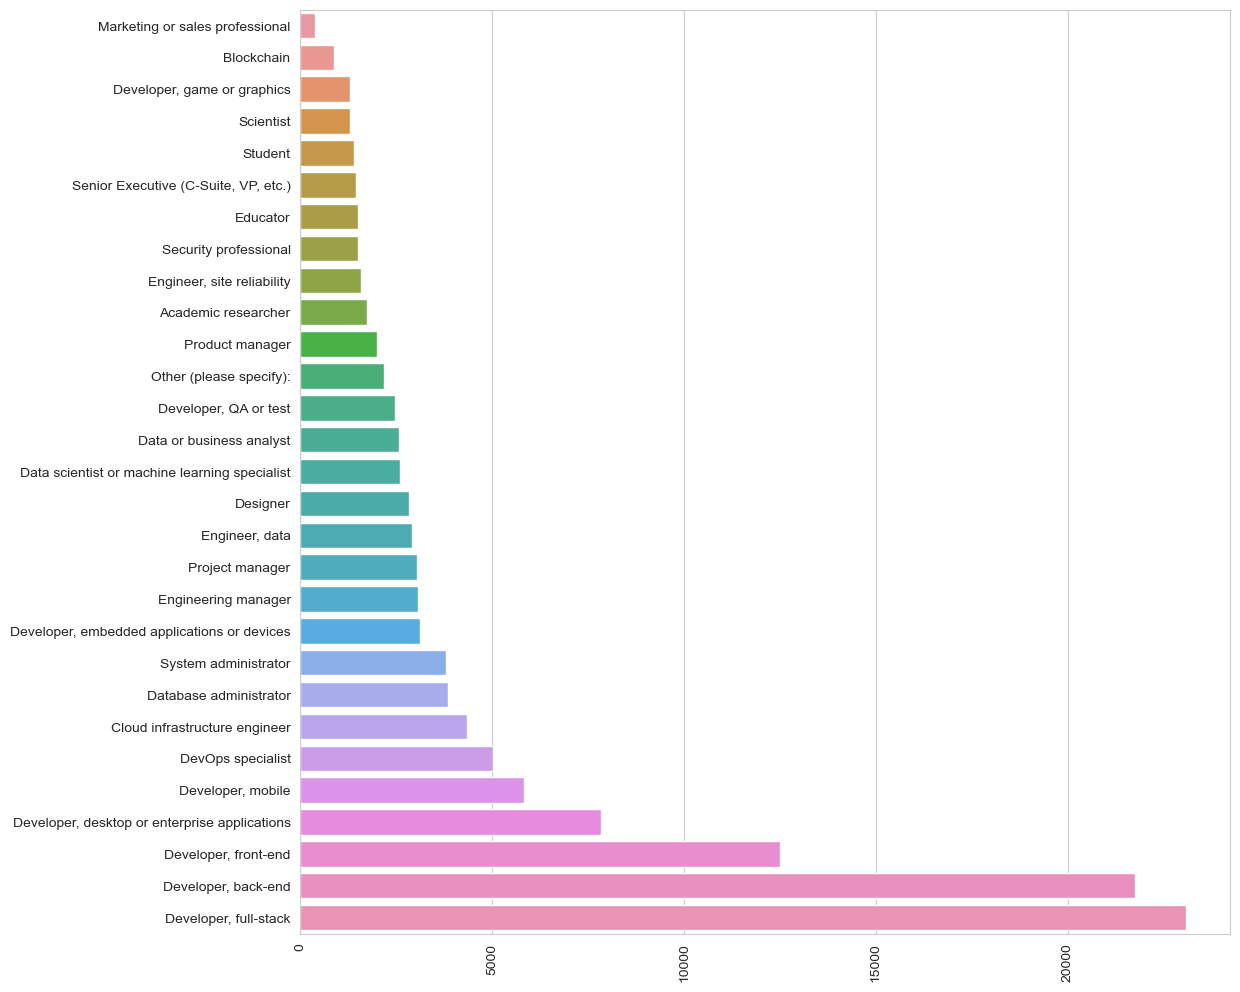

In [260]:
dev=splitcol(survey_df["DevType"])
dev_tot=dev.sum().sort_values(ascending=True)
plt.figure(figsize=(12,12))
sns.barplot(x=dev_tot,y=dev_tot.index)
plt.xticks(rotation=90)

this shows that most of the users are involved in development related to full stack and backend compared to data science. less that 5000 users are involved to data science

## Languages worked with for the year 2022

In [261]:
lang=splitcol(survey_df["LanguageHaveWorkedWith"])
lang

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,Lua,PHP,...,APL,Crystal,Julia,Fortran,Objective-C,SAS,F#,OCaml,COBOL,Solidity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,True,True,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73264,True,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73266,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [262]:
lang_total=lang.sum().sort_values(ascending=False)
lang_total

JavaScript     37872
HTML/CSS       31545
SQL            28788
Python         27423
TypeScript     20083
Java           18942
Bash/Shell     16885
C#             16320
C++            12452
PHP            11535
C              10459
PowerShell      6970
Go              6447
Rust            5222
Kotlin          5086
Ruby            3535
Dart            3423
Assembly        2781
Swift           2756
VBA             2591
R               2503
Lua             2218
MATLAB          2103
Groovy          2028
Delphi          1987
Scala           1496
Perl            1373
Objective-C     1357
Elixir          1244
Haskell         1088
Clojure          890
Julia            843
LISP             726
Solidity         720
F#               574
Fortran          507
Erlang           497
APL              393
COBOL            373
SAS              327
OCaml            283
Crystal          266
dtype: int64

In [263]:
lang_percent=lang_total*100/lang_total.count()
lang_percent

JavaScript     90171.428571
HTML/CSS       75107.142857
SQL            68542.857143
Python         65292.857143
TypeScript     47816.666667
Java           45100.000000
Bash/Shell     40202.380952
C#             38857.142857
C++            29647.619048
PHP            27464.285714
C              24902.380952
PowerShell     16595.238095
Go             15350.000000
Rust           12433.333333
Kotlin         12109.523810
Ruby            8416.666667
Dart            8150.000000
Assembly        6621.428571
Swift           6561.904762
VBA             6169.047619
R               5959.523810
Lua             5280.952381
MATLAB          5007.142857
Groovy          4828.571429
Delphi          4730.952381
Scala           3561.904762
Perl            3269.047619
Objective-C     3230.952381
Elixir          2961.904762
Haskell         2590.476190
Clojure         2119.047619
Julia           2007.142857
LISP            1728.571429
Solidity        1714.285714
F#              1366.666667
Fortran         1207

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

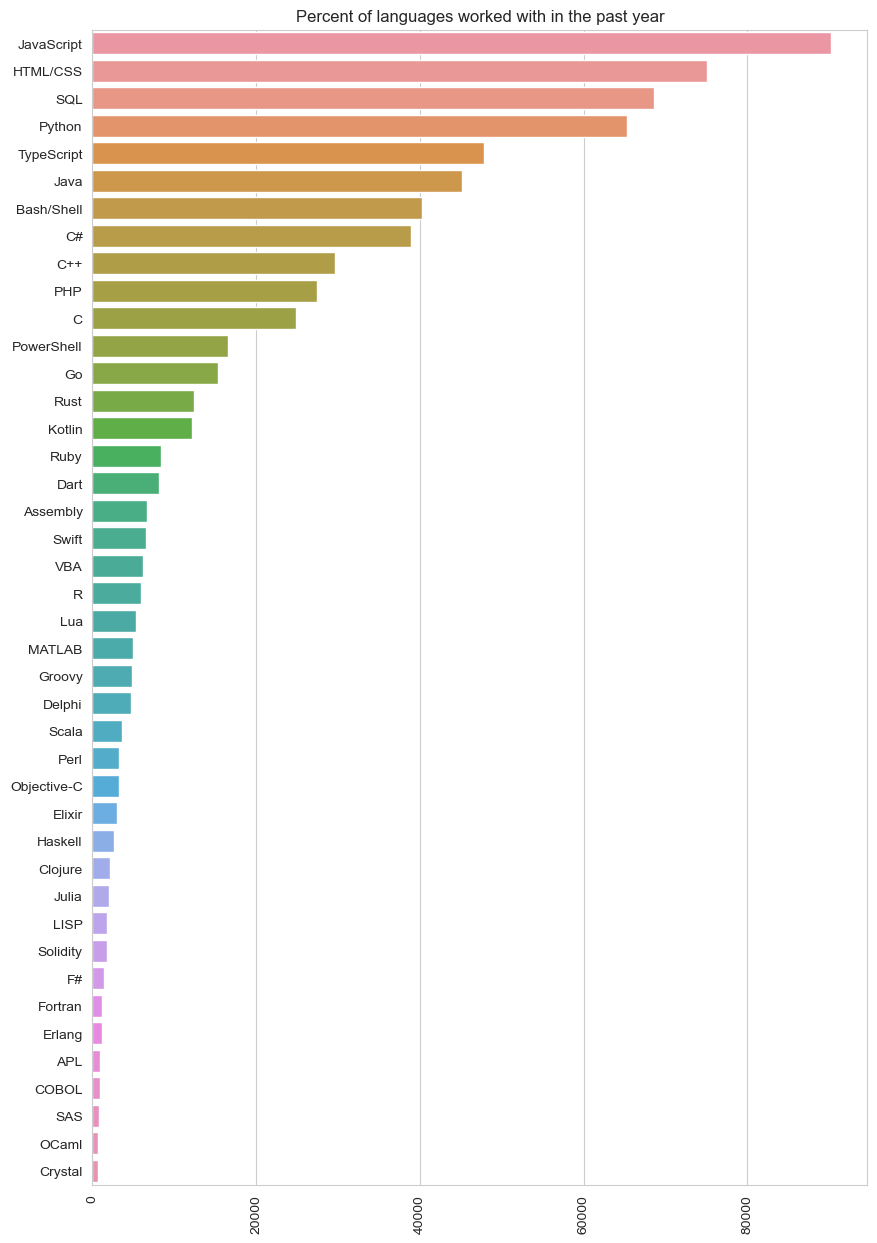

In [264]:
plt.figure(figsize=(10,15))
plt.title("Percent of languages worked with in the past year")
sns.barplot(x=lang_percent,y=lang_percent.index)
plt.xticks(rotation=90)

Javascript is the most popular language used.Although typescript is similar to js html/css takes up the second place followed by js as the most popular language.More than 6000 people are interested in scripting and markup language

## Percent of languages popular for the upcoming year

In [265]:
langwant=splitcol(survey_df["LanguageWantToWorkWith"])

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

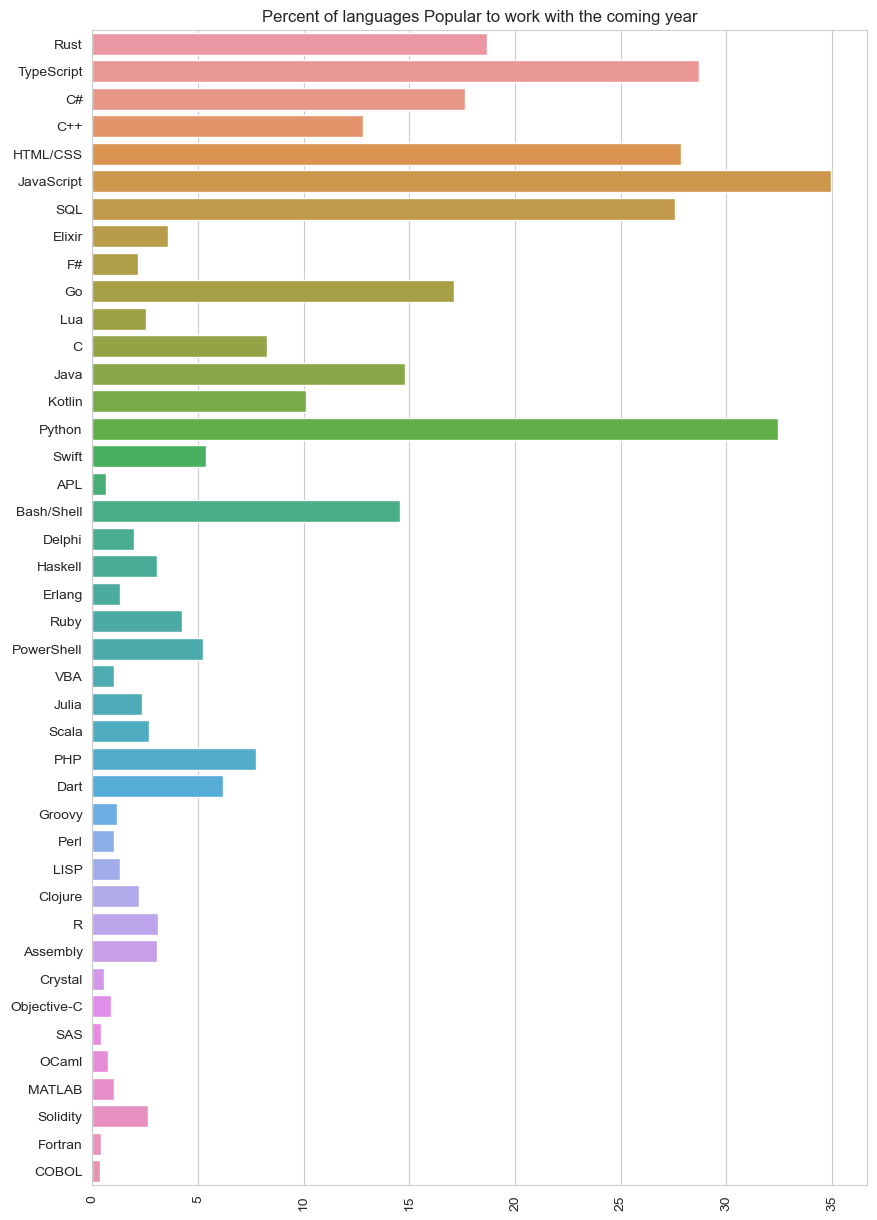

In [266]:
lang_mean=langwant.mean()*100
plt.figure(figsize=(10,15))
plt.title("Percent of languages Popular to work with the coming year")
sns.barplot(x=lang_mean,y=lang_mean.index)
plt.xticks(rotation=90)

Again from the plot although most people want to work with javascript , Python is the second most popular language for the upcoming year having greater that 30% of popularity among users, followed by typescript.

In [267]:
cloud_lang=cloud["LanguageHaveWorkedWith"]
cloud_lang.value_counts()

Python                                                                         6
Bash/Shell;Go;Python                                                           2
Bash/Shell;Python                                                              2
Bash/Shell;C;C++;Go;Java;JavaScript;Python;Rust                                1
Bash/Shell;Go;Groovy;PHP;Python                                                1
                                                                              ..
Bash/Shell;C;Delphi;Groovy;Haskell;HTML/CSS;Perl;PowerShell;Python;Ruby;SQL    1
Bash/Shell;C#;Go;Java;PowerShell;Python;Rust                                   1
C;Go;PHP;Python;Ruby;Rust;SQL                                                  1
Bash/Shell;C#;Elixir;Erlang;F#;Go;JavaScript;PowerShell;Python;Rust            1
Bash/Shell;Dart;Python                                                         1
Name: LanguageHaveWorkedWith, Length: 113, dtype: int64

## Popular language used by most cloud infrastructure engineer

In [268]:
cloud=survey_df[survey_df.DevType=="Cloud infrastructure engineer"]
cloud

,Country,Age,Gender,EdLevel,WorkExp,CodingActivities,LearnCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,Employment,DevType,RemoteWork,MainBranch
797,Romania,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Hobby,Books / Physical media;Friend or family member...,9.0,2.0,Bash/Shell;C;C++;Go;Java;JavaScript;Python;Rust,Bash/Shell;Java;Python;Rust,IntelliJ;Vim;Visual Studio Code,IntelliJ;Vim;Visual Studio Code,"Employed, full-time",Cloud infrastructure engineer,Fully remote,I am a developer by profession
834,Canada,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0,Hobby,Friend or family member;Other online resources...,10.0,4.0,Bash/Shell;C++;Go;Java;Python;Rust;SQL,Java;Python;Rust,Atom;CLion;IntelliJ;IPython/Jupyter;PyCharm;Vi...,Atom;CLion;IntelliJ;IPython/Jupyter;PyCharm;Vi...,"Employed, full-time",Cloud infrastructure engineer,"Hybrid (some remote, some in-person)",I am a developer by profession
1155,United States of America,18-24 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2.0,Hobby;Contribute to open-source projects,"Other online resources (e.g., videos, blogs, f...",4.0,2.0,Bash/Shell;C#;C++;HTML/CSS;JavaScript;Python;Rust,Bash/Shell;C#;Rust,Visual Studio;Visual Studio Code,Visual Studio Code,"Employed, full-time",Cloud infrastructure engineer,Fully remote,I am a developer by profession
1197,United States of America,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Hobby,"School (i.e., University, College, etc)",7.0,2.0,Bash/Shell;Go;Groovy,APL;C++;Java,CLion;GoLand;Visual Studio Code,CLion;IntelliJ;Visual Studio Code,"Employed, full-time",Cloud infrastructure engineer,Fully remote,I am a developer by profession
1703,United States of America,25-34 years old,Prefer not to say,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,Hobby,Books / Physical media;Other online resources ...,20.0,10.0,Bash/Shell;Go;Groovy;HTML/CSS;Java;JavaScript;...,Go;Python,Sublime Text;Visual Studio Code,Visual Studio Code,"Employed, full-time",Cloud infrastructure engineer,Fully remote,I am a developer by profession
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70939,France,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Contribute to open-source projects;Freelance/c...,"Friend or family member;School (i.e., Universi...",15.0,6.0,Bash/Shell;C;Go;Java;JavaScript;Lua;Python,Bash/Shell;C;Go;Python;Rust,Nano;Sublime Text,Nano;Sublime Text,"Employed, full-time",Cloud infrastructure engineer,"Hybrid (some remote, some in-person)",I am a developer by profession
71069,South Africa,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Hobby;Bootstrapping a business,"Other online resources (e.g., videos, blogs, f...",3.0,1.0,Bash/Shell;JavaScript;SQL;TypeScript,Java;Python,RStudio;Visual Studio Code,IntelliJ;Visual Studio Code,"Employed, full-time",Cloud infrastructure engineer,"Hybrid (some remote, some in-person)",I am a developer by profession
71117,France,18-24 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2.0,I don’t code outside of work,"School (i.e., University, College, etc)",6.0,2.0,Bash/Shell;Clojure;Go;Java;SQL,Go;Rust,Eclipse;Emacs;Visual Studio Code,Emacs,"Independent contractor, freelancer, or self-em...",Cloud infrastructure engineer,Fully remote,I am a developer by profession
72048,Colombia,25-34 years old,Man,"Professional degree (JD, MD, etc.)",5.0,Hobby;Contribute to open-source projects,Books / Physical media;Other online resources ...,10.0,4.0,Assembly;Bash/Shell;C;C++;Dart;Go;Haskell;Java...,Bash/Shell;Haskell;Julia;Rust,Android Studio;Eclipse;Notepad++;RStudio;Subli...,NaN,"Employed, full-time",Cloud infrastructure engineer,"Hybrid (some remote, some in-person)",I am a developer by profession


<AxesSubplot:title={'center':'Percent of popular Languages used by  cloud infrastructure engineers'}, xlabel='LanguageHaveWorkedWith'>

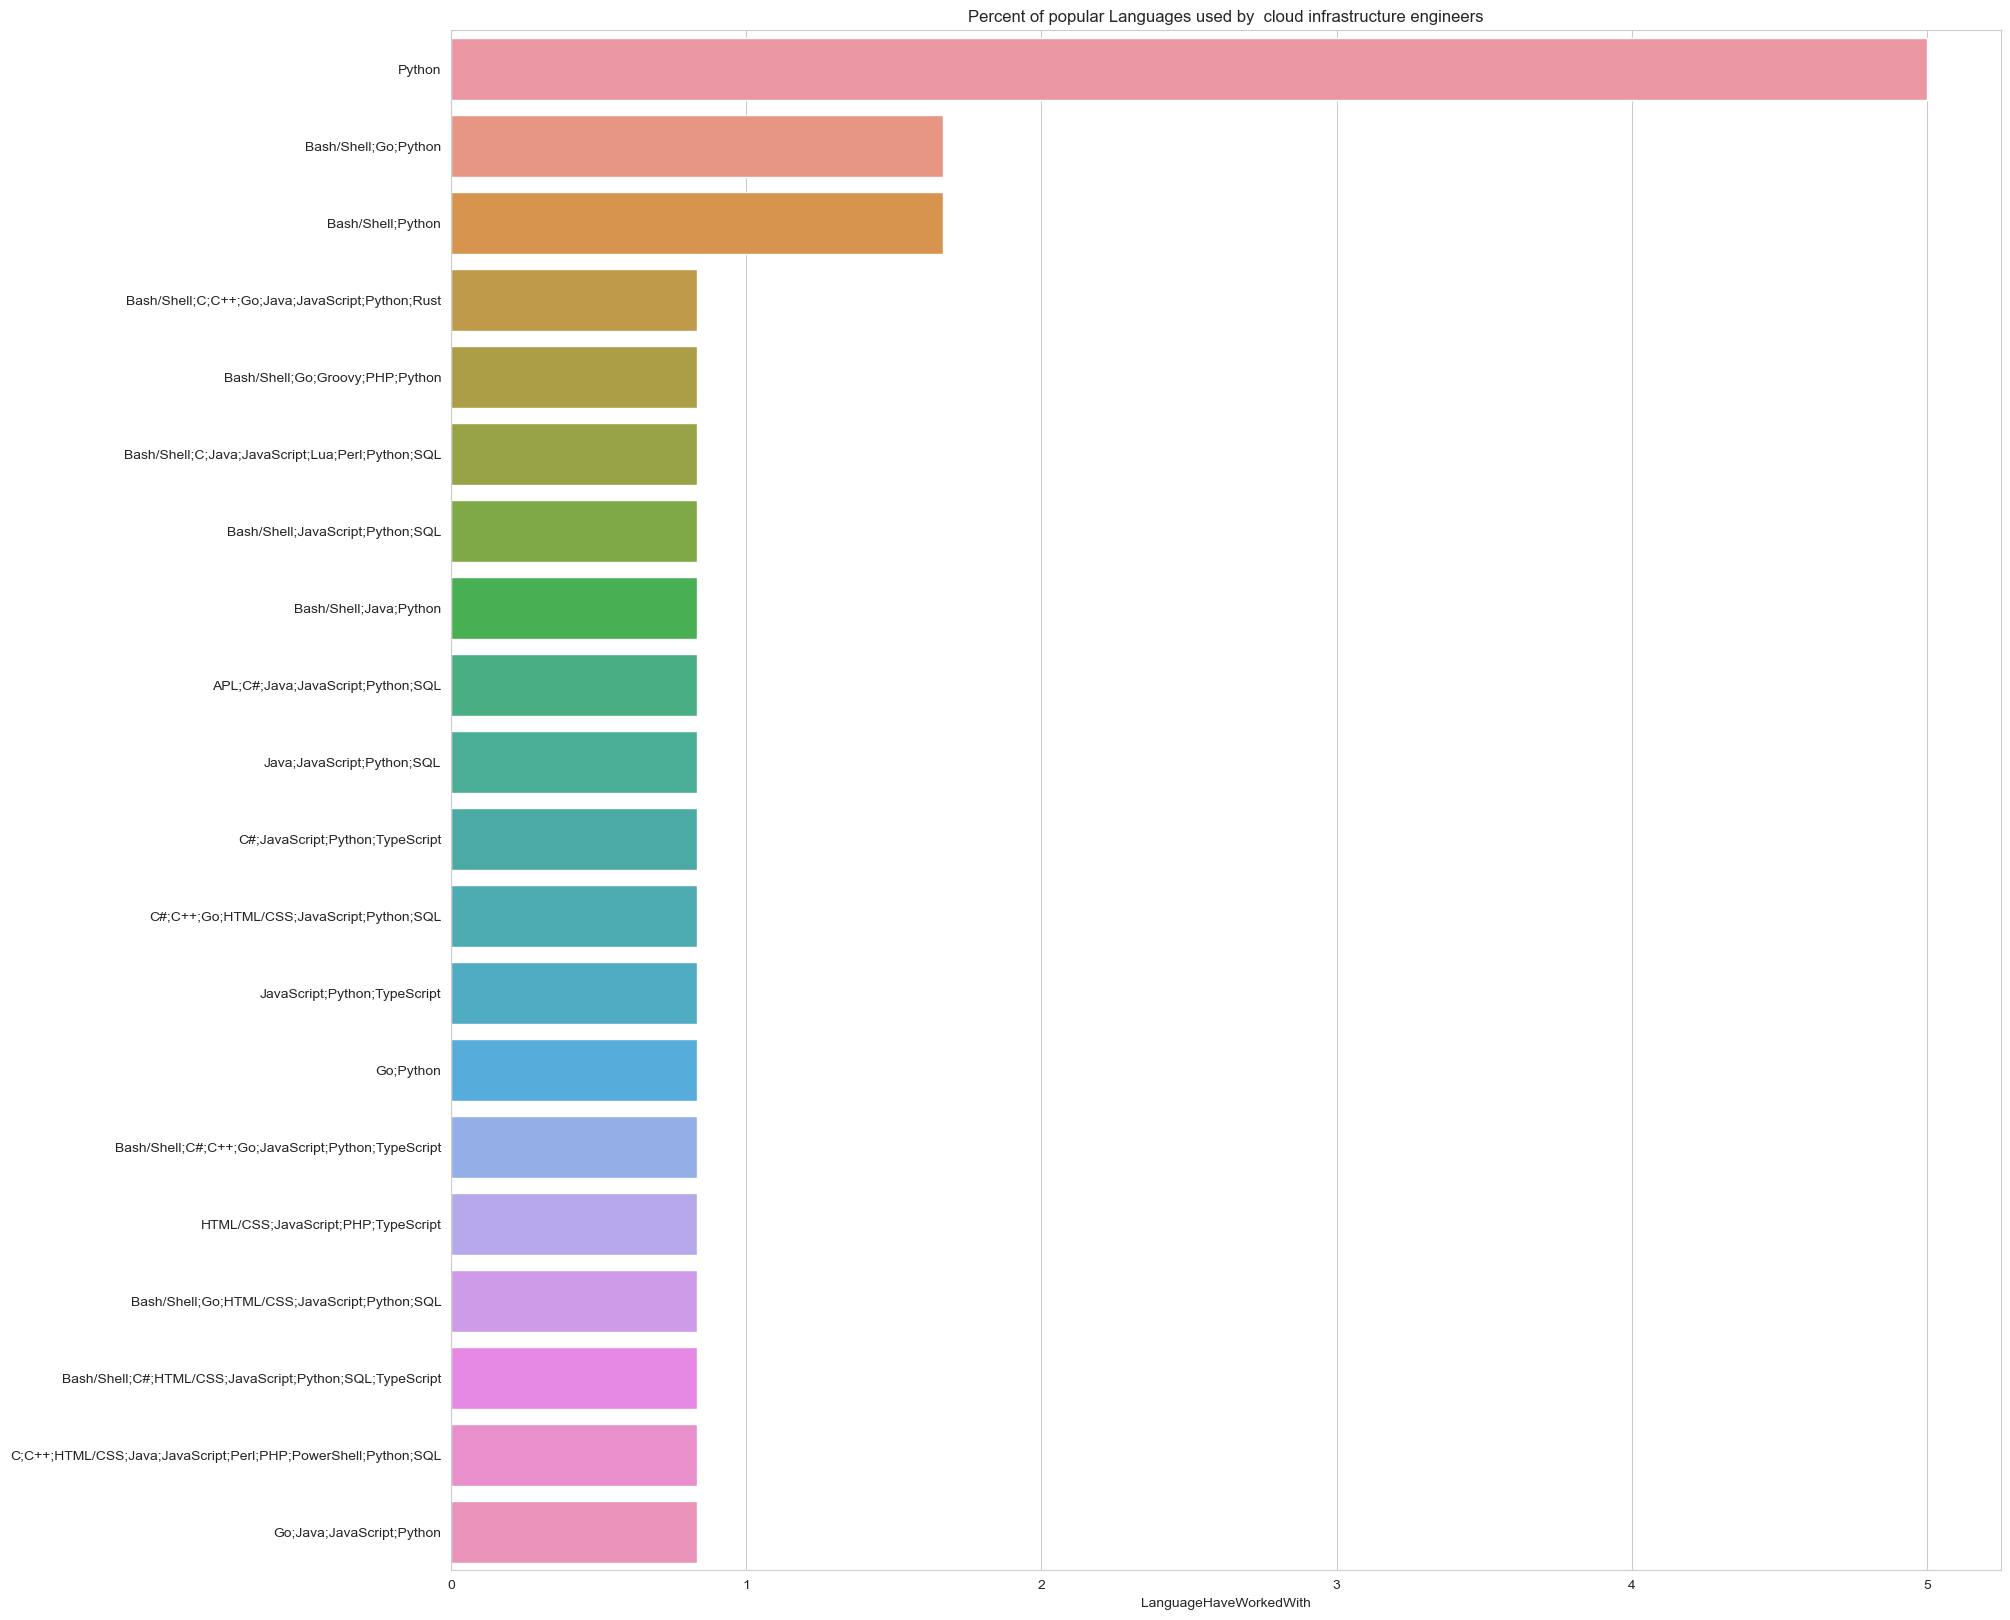

In [269]:
percent_cloud=(cloud_lang.value_counts()*100/cloud_lang.count()).head(20)
plt.figure(figsize=(20,20))
plt.title("Percent of popular Languages used by  cloud infrastructure engineers")
plt.xlabel("percent")
plt.ylabel("")
sns.barplot(x=percent_cloud,y=percent_cloud.index)

It appears that most of the cloud engineers use python and other languages include bash 

## Collab Tools Used

In [270]:
tools=(survey_df["NEWCollabToolsHaveWorkedWith"].value_counts(normalize=True, ascending=False)*100).head(15)

In [271]:
tools

Visual Studio Code                            9.933651
Visual Studio;Visual Studio Code              4.371557
Notepad++;Visual Studio;Visual Studio Code    3.036040
Vim;Visual Studio Code                        2.092821
IntelliJ;Visual Studio Code                   1.823330
Visual Studio                                 1.142779
Vim                                           1.127428
IntelliJ                                      1.089904
Notepad++;Visual Studio Code                  0.985860
Sublime Text;Visual Studio Code               0.905695
Notepad++;Visual Studio                       0.822119
Android Studio;Visual Studio Code             0.793123
Emacs                                         0.716369
IPython/Jupyter;Visual Studio Code            0.637910
Android Studio;Visual Studio Code;Xcode       0.629381
Name: NEWCollabToolsHaveWorkedWith, dtype: float64

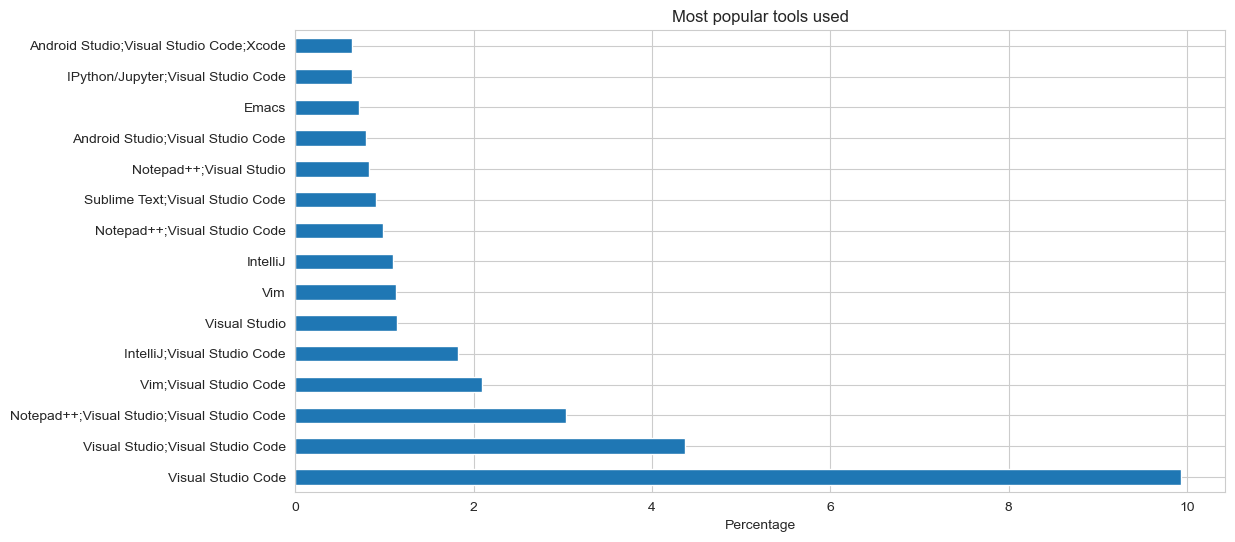

In [272]:
plt.figure(figsize=(12,6))
plt.title("Most popular tools used")
tools.plot(kind='barh')
plt.xlabel('Percentage');

Visual Studio Code is the most popular tool used for collab and code compile and execution, whereas no other tool is as popular as vscode. vscode holds about more that 50% compared to atom that holds only around 3%

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. Despite having a good overall developer community, it has fewer responses from programmers from non-English-speaking countries and women & non-binary genders.

- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field.Also there are a mojority od students who work full time 

- Javascript & HTML/CSS are the most used programming languages in 2022, closely followed by SQL & Python and typescript.

- Javascript is the language most people are interested in learning because of its demand in today's technological era followed by python and then typescript

- The most popular languages used by cloud engineers are python and bash and also python bash combined

- Visual studio code is the most popular collab tool used bu most users , it holds about more than 50% , atom is the least preferred one

# References

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- geeksforgeeks:https://www.geeksforgeeks.org/